# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing Dataset

In [4]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation

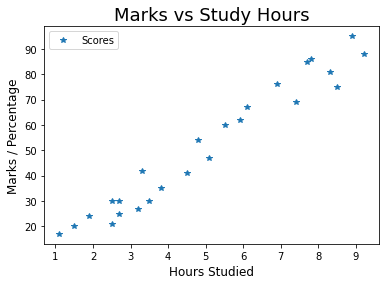

In [14]:
data.plot (x='Hours', y='Scores' ,style='*')
plt.title('Marks vs Study Hours',size=18)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Marks / Percentage', size=12)  
plt.show()

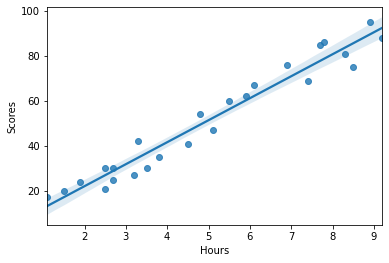

In [16]:
sns.regplot(x= data['Hours'], y=data['Scores'])

# Preparing Data And Splitting It Into Train And Test Set

In [19]:
x= data.iloc[:, :-1].values
y= data.iloc[:, 1].values

train_x, val_x, train_y, val_y, = train_test_split(x,y, random_state = 0)

# Training Model Using Linear Regression.

In [21]:
regression = LinearRegression()
regression.fit(train_x , train_y)

LinearRegression()

# Predicting Marks

In [27]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction.tail(10)

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing Predicted Marks With Actual Marks

In [26]:
comp_score = pd.DataFrame({'Actual Marks': val_y , 'Predicted Marks' : pred_y})
comp_score.tail(10)

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Text(0.5, 0, 'Hours Studied')

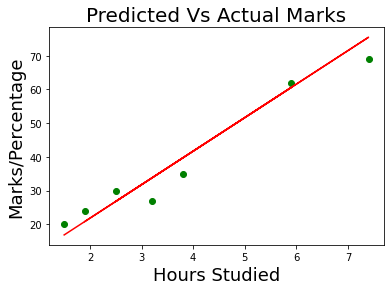

In [36]:
plt.scatter(x=val_x , y=val_y, color='green')
plt.plot(val_x, pred_y, color='red')
plt.title('Predicted Vs Actual Marks', size='20')
plt.ylabel('Marks/Percentage', size='18')
plt.xlabel('Hours Studied', size='18')

# Accuracy

In [39]:
metrics.r2_score(val_y,pred_y)

0.9367661043365055

# Evaulate The Model

In [40]:
metrics.mean_squared_error(val_y,pred_y)
metrics.mean_absolute_error(val_y,pred_y)

4.130879918502486

# Predicted Marks For Student

In [42]:
hours = [9.25]
ans = regression.predict([hours])
print("The Answer Is:",ans)

The Answer Is: [93.89272889]
